In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier
from datetime import datetime, date

In [3]:
# Reading the data from the .csv file.
cust_df = pd.read_csv("Data/customer_data.csv", sep='\t')

In [4]:
cust_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Total amount spent on wine by customers.
wine_amt = cust_df.MntWines.sum()
# Total amount spent on fruits by customers.
fruits_amt = cust_df.MntFruits.sum()
# Total amount spent on meat by customers.
meat_amt = cust_df.MntMeatProducts.sum()
# Total amount spent on fish by customers.
fish_amt = cust_df.MntFishProducts.sum()
# Total amount spent on sweets by customers.
sweets_amt = cust_df.MntSweetProducts.sum()

data = {'Products': ['wine','fruits','meat','fish','sweets'] ,'Amount': [wine_amt, fruits_amt, meat_amt, fish_amt, sweets_amt]}
products_df = pd.DataFrame(data=data)
products_df

,Products,Amount
0,wine,680816
1,fruits,58917
2,meat,373968
3,fish,84057
4,sweets,60621


Visualization 1: Bar graph of Revenue to the company in last 2 years - Product wise.

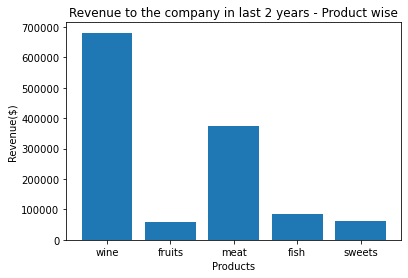

In [6]:
plt.bar(products_df['Products'], products_df['Amount'])
plt.xlabel('Products')
plt.ylabel('Revenue($)')
plt.title('Revenue to the company in last 2 years - Product wise')
plt.show()

The above Bar graph explains about the products on which the company is generating the revenue. By looking at the graph it showa that Wine product is generating more revenue to the company in the last 2 years.




Visualization 2: Histogram of the number of customers compained in the last 2 years

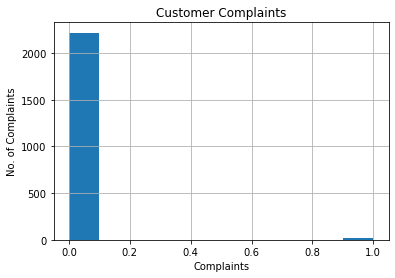

In [7]:
# Complain: 1 if the customer complained in the last 2 years, 0 otherwise
cust_df.Complain.hist()
plt.xlabel('Complaints')
plt.ylabel('No. of Complaints')
plt.title('Customer Complaints')
plt.show()

The above Histogram explains about the number of customers compained in the last 2 years. We can understand that there are very less number of customers who complained on the products

Visualization 3: Pie chart of place where the customers purchasing the products.

In [56]:
# Total purchases from Web: 
NumWebPur = cust_df.NumWebPurchases.sum()
# Total purchases from catalog: 
NumCatalogPur = cust_df.NumCatalogPurchases.sum()
# Total purchases from store: 
NumStorePur = cust_df.NumStorePurchases.sum()

data = {'Place': ['Web','Catalog','Store'] ,'NumOfPurchases': [NumWebPur, NumCatalogPur, NumStorePur]}
placepur_df = pd.DataFrame(data=data)
placepur_df

,Place,NumOfPurchases
0,Web,9150
1,Catalog,5963
2,Store,12970


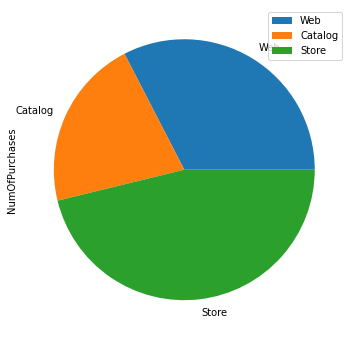

In [52]:
placepurp_df.plot.pie(y='NumOfPurchases', figsize=(8, 6))
plt.show()

The above Pie chart shows that customers are more inclined towards going to store and purchasing the products. So we can focus on the updating the store with customer friendly environment.

Visualization 4: Histogram of the Reponse of the customer whether he accepted the offer in the last campaign or not.

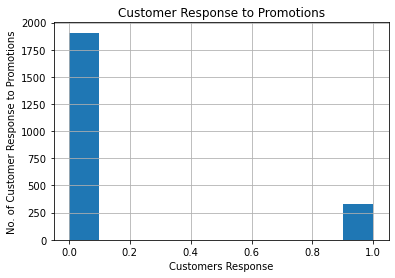

In [8]:
# Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
cust_df.Response.hist()
plt.xlabel('Customers Response')
plt.ylabel('No. of Customer Response to Promotions')
plt.title('Customer Response to Promotions')
plt.show()

Above graph explains about number of customer accepted the offer on deals that the company has provided. It looks like very less number of the customer has accepted the offer in the last campaign. So the campaign deals have the increased to attract more customers.

In [9]:
# Step 1:
# Identifying unwanted columns and deleting them from data frame as they are not required for our analysis.

# Removing unwanted columns from dataframe.
cust_df = cust_df.drop(['Education','Marital_Status','Dt_Customer','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Z_CostContact','Z_Revenue'], axis = 1)

# Checking data frame columns.
cust_df.columns

Index(['ID', 'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response'],
      dtype='object')

In [10]:
# Step 2:

# Adding 'Age' column to dataframe.

# Function to convert given birth date to age.
def age(born):
    born = datetime.strptime(str(born), "%Y").date()
    today = date.today()
    return today.year - born.year

# Creating 'Age' column and adding its appropriate values.
cust_df['Age'] = cust_df['Year_Birth'].apply(age)

# Checking data frame.
cust_df.head()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,5524,1957,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,65
1,2174,1954,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68
2,4141,1965,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,57
3,6182,1984,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,38
4,5324,1981,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,41


In [159]:
# Creating 'NumPurchases', 'MntTotal' columns and adding its appropriate values.
cust_df['NumPurchases'] = cust_df['NumWebPurchases'] + cust_df['NumStorePurchases'] + cust_df['NumCatalogPurchases']
cust_df['MntTotal'] = cust_df['MntWines'] + cust_df['MntFruits'] + cust_df['MntMeatProducts'] + cust_df['MntFishProducts'] + cust_df['MntSweetProducts'] + cust_df['MntGoldProds']
cust_df.head()

,ID,Year_Birth,Income,NumOfDaysLastPurchase,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,NumPurchases,MntTotal
0,5524,1957,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,65,22,1617
1,2174,1954,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68,4,27
2,4141,1965,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,57,20,776
3,6182,1984,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,38,6,53
4,5324,1981,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,41,14,422


We have added a new column 'Age' to determine the age of the customers and understand the demographics of the customer population and their purchases.

In [160]:
# Step 3:
# Converting the data frame columns to appropriate datatypes.

# Checking the column data types.
cust_df.dtypes

ID                         int64
Year_Birth                 int64
Income                   float64
NumOfDaysLastPurchase      int64
MntWines                   int64
MntFruits                  int64
MntMeatProducts            int64
MntFishProducts            int64
MntSweetProducts           int64
MntGoldProds               int64
NumDealsPurchases          int64
NumWebPurchases            int64
NumCatalogPurchases        int64
NumStorePurchases          int64
NumWebVisitsMonth          int64
Complain                   int64
Response                   int64
Age                        int64
NumPurchases               int64
MntTotal                   int64
dtype: object

In [161]:
# Modifying the column name to appropriate name.
cust_df.rename(columns = {'Recency':'NumOfDaysLastPurchase'}, inplace = True)

# Checking the columns.
cust_df.columns

Index(['ID', 'Year_Birth', 'Income', 'NumOfDaysLastPurchase', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'NumPurchases', 'MntTotal'],
      dtype='object')

In [162]:
# Step 4:

# Checking the missing data.
cust_df.isnull().sum()

ID                       0
Year_Birth               0
Income                   0
NumOfDaysLastPurchase    0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
Complain                 0
Response                 0
Age                      0
NumPurchases             0
MntTotal                 0
dtype: int64

In [163]:
# Updating null values to mean to avoid graphical errors.
cust_df['Income'] = cust_df['Income'].fillna(cust_df['Income'].mean())

# Re-checking the missing data.
cust_df.isnull().sum()

ID                       0
Year_Birth               0
Income                   0
NumOfDaysLastPurchase    0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
Complain                 0
Response                 0
Age                      0
NumPurchases             0
MntTotal                 0
dtype: int64

For the Income column we had some null values which may distrupt our graphs. We replaced the null values to mean.

As we do not have any categorical data, there is no need of creating dummy variables.

In [148]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [193]:
# Choosing the Predictor columns.
X = cust_df[['Income','Age','NumPurchases']]

# Choosing the target column.
y = cust_df['MntTotal']

# Splitting data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [194]:
# Training model on training data.
regr = linear_model.LinearRegression()

# Fitting model.
regr.fit(X_train, y_train)

# Calculating accuracy score.
regr.score(X_test, y_test)

0.753172017298735

In [195]:
# Calculating R2, RMSE and MAE on the training set.
preds = regr.predict(X_train)

r2 = metrics.r2_score(y_train, preds)
rmse = np.sqrt(mean_squared_error(y_train,preds))
mae = metrics.mean_absolute_error(y_train, preds)

print("Training set: \n R2: %.4f \n RMSE: %.4f \n Mean Absolute Error: %.4f" % (r2,rmse,mae))

# Calculating R2, RMSE and MAE on the testing set.
preds = regr.predict(X_test)

r2 = metrics.r2_score(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test,preds))
mae = metrics.mean_absolute_error(y_test, preds)

print("\nTesting set: \n R2: %.4f \n RMSE: %.4f \n Mean Absolute Error: %.4f" % (r2,rmse,mae))

Training set: 
 R2: 0.7024 
 RMSE: 326.3512 
 Mean Absolute Error: 223.3821

Testing set: 
 R2: 0.7532 
 RMSE: 306.7999 
 Mean Absolute Error: 221.0470
